# The Movie Database API Exploration

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 500 pages
popular_movies = []

for PAGE in range(1, 501):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

# Movies Without Release Date

In [5]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [6]:
data = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,adult,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,1,False,338953,en,3456.961,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1795
1,2,False,629542,en,1159.223,/7qop80YfuO0BwJa1uXk1DXUUEwv.jpg,The Bad Guys,7.8,650
2,3,False,823625,en,704.187,/bv9dy8mnwftdY2j6gG39gCfSFpV.jpg,Blacklight,6.3,438
3,4,False,135397,en,520.592,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,Jurassic World,6.7,18114
4,5,False,459151,en,433.276,/kv2Qk9MKFFQo4WQPaYta599HkJP.jpg,The Boss Baby: Family Business,7.6,1952


In [7]:
# drop page number and adult columns
df.drop(columns=['page_number', 'adult'], inplace=True)
df

,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,338953,en,3456.961,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1795
1,629542,en,1159.223,/7qop80YfuO0BwJa1uXk1DXUUEwv.jpg,The Bad Guys,7.8,650
2,823625,en,704.187,/bv9dy8mnwftdY2j6gG39gCfSFpV.jpg,Blacklight,6.3,438
3,135397,en,520.592,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,Jurassic World,6.7,18114
4,459151,en,433.276,/kv2Qk9MKFFQo4WQPaYta599HkJP.jpg,The Boss Baby: Family Business,7.6,1952
...,...,...,...,...,...,...,...
495,603519,en,10.652,/b8P13nIvkkizVBzd2RpegsRt5zP.jpg,Beats,6.8,210
496,31417,fr,10.637,/8y7Z9Gvcq52uOlJlUWyn2epGGRd.jpg,Eyes Without a Face,7.6,516
497,29756,en,10.618,/8CyQj2VIfmGzjvdoLwYLyT8h4YS.jpg,13 Ghosts,5.8,100
498,27327,en,10.604,/qDOtGWeSQNwB3dG7Amt1K0JW0az.jpg,Phantom of the Paradise,7.5,470


In [8]:
df.shape

(500, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   original_language  500 non-null    object 
 2   popularity         500 non-null    float64
 3   poster_path        498 non-null    object 
 4   title              500 non-null    object 
 5   vote_average       500 non-null    float64
 6   vote_count         500 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 27.5+ KB


In [10]:
df['id'] = df['id'].astype('category')                  # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: id
Non-Null Count  Dtype   
--------------  -----   
500 non-null    category
dtypes: category(1)
memory usage: 21.2 KB


In [11]:
pd.value_counts(df.dtypes)

object      3
float64     2
category    1
int64       1
dtype: int64

In [12]:
df.describe(exclude='number')

,id,original_language,poster_path,title
count,500,500,498,500
unique,500,20,498,498
top,71,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Valentine
freq,1,376,1,2


In [13]:
df.describe(include='number')

,popularity,vote_average,vote_count
count,500.000000,500.000000,500.000000
mean,43.133808,6.346800,1309.848000
std,170.374360,1.410741,2405.288132
min,10.590000,0.000000,0.000000
25%,13.194250,5.900000,142.500000
50%,18.234000,6.500000,404.000000
75%,31.787750,7.200000,1281.250000
max,3456.961000,9.500000,18114.000000


In [14]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

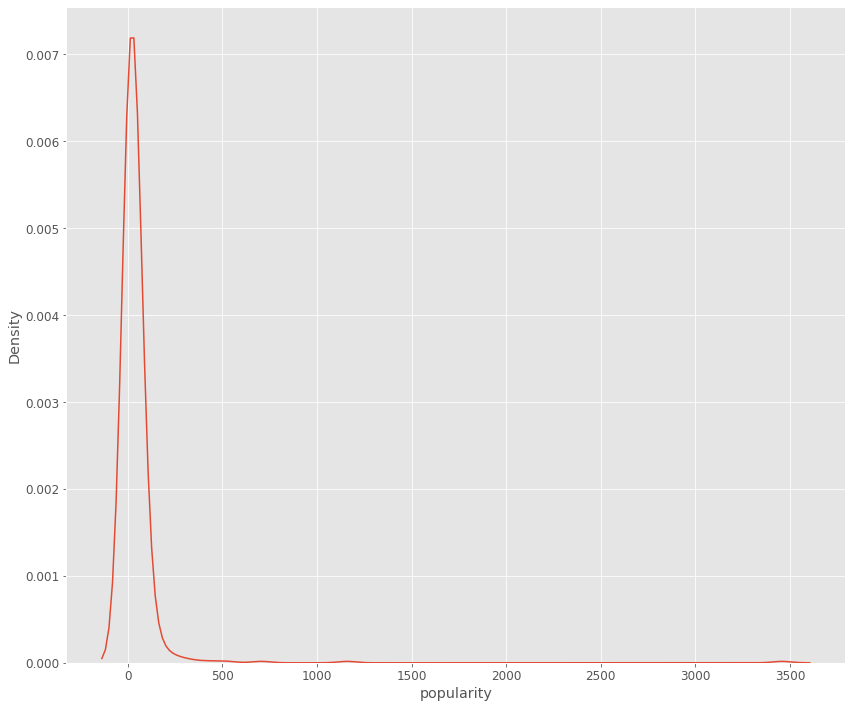

In [15]:
plotkde(data=df, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

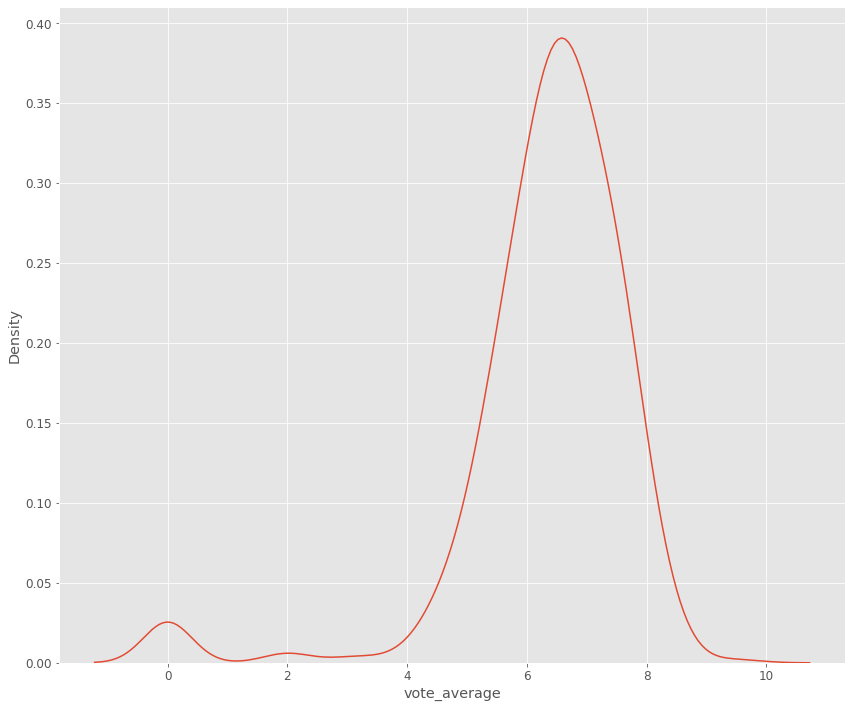

In [16]:
plotkde(data=df, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

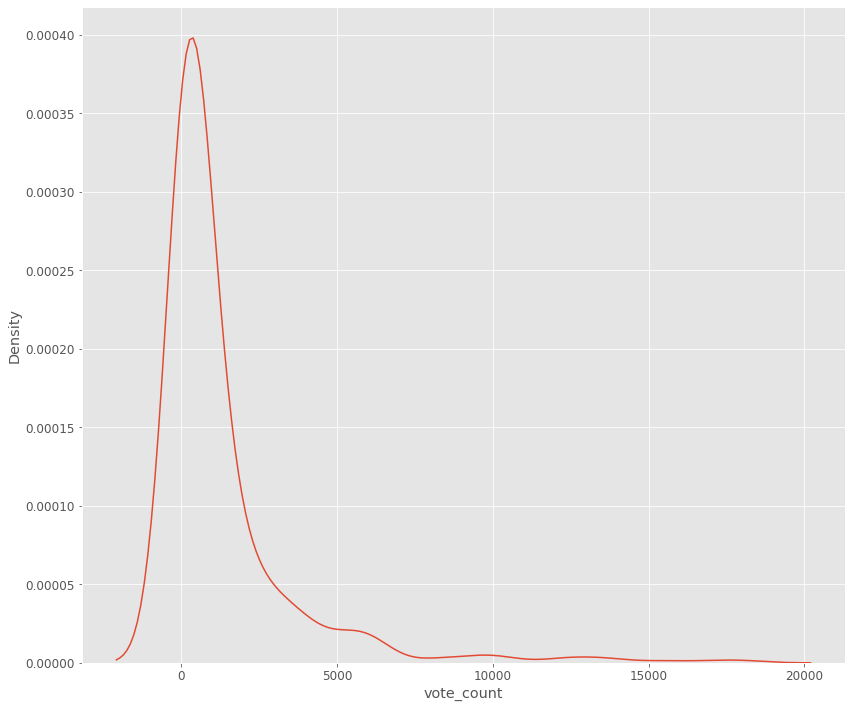

In [17]:
plotkde(data=df, x='vote_count')

# Missing Values Exploration

In [18]:
df.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          2
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

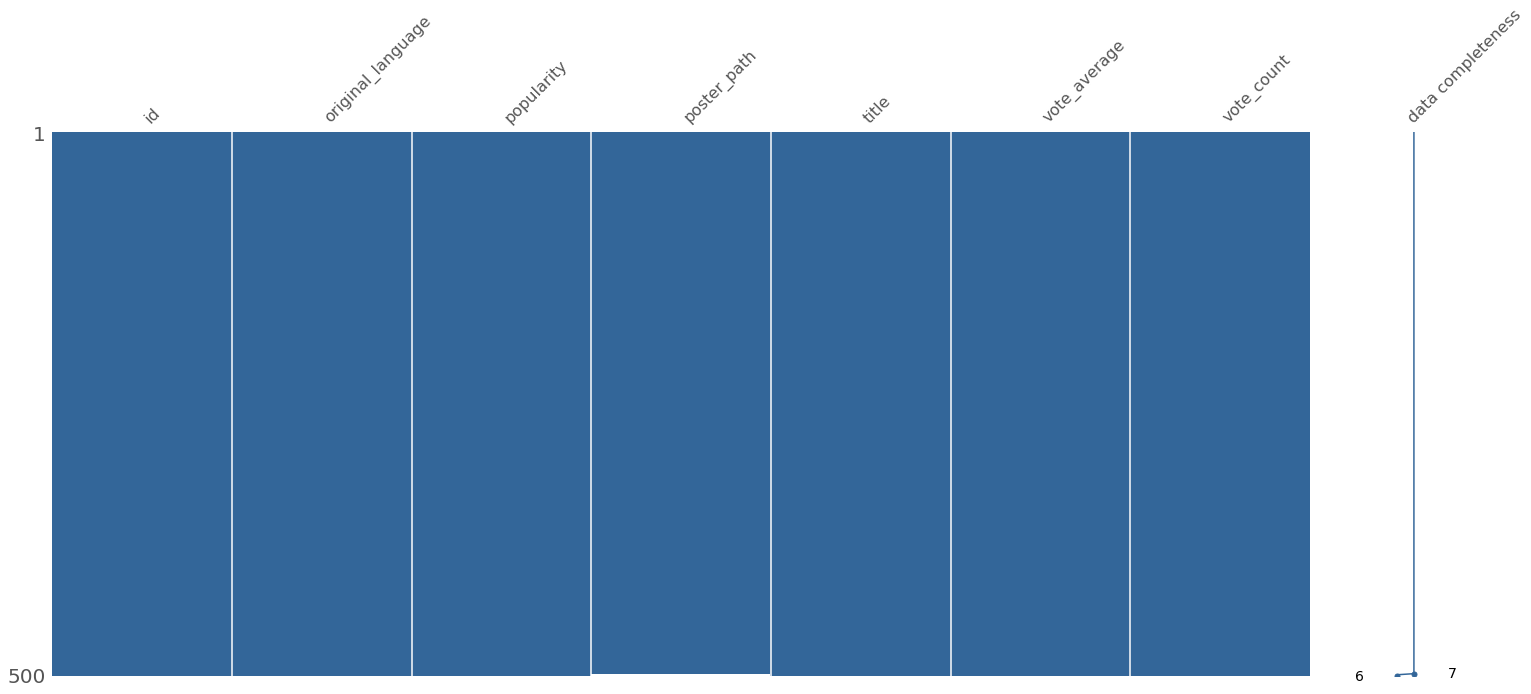

In [19]:
msno.matrix(df, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

In [20]:
df.duplicated().sum()                                   # check for duplicates

0

In [21]:
df.loc[df.duplicated(subset=['id'])]                    # check where id is duplicated

,id,original_language,popularity,poster_path,title,vote_average,vote_count


[Text(0.5, 1.0, 'Count of unique original language')]

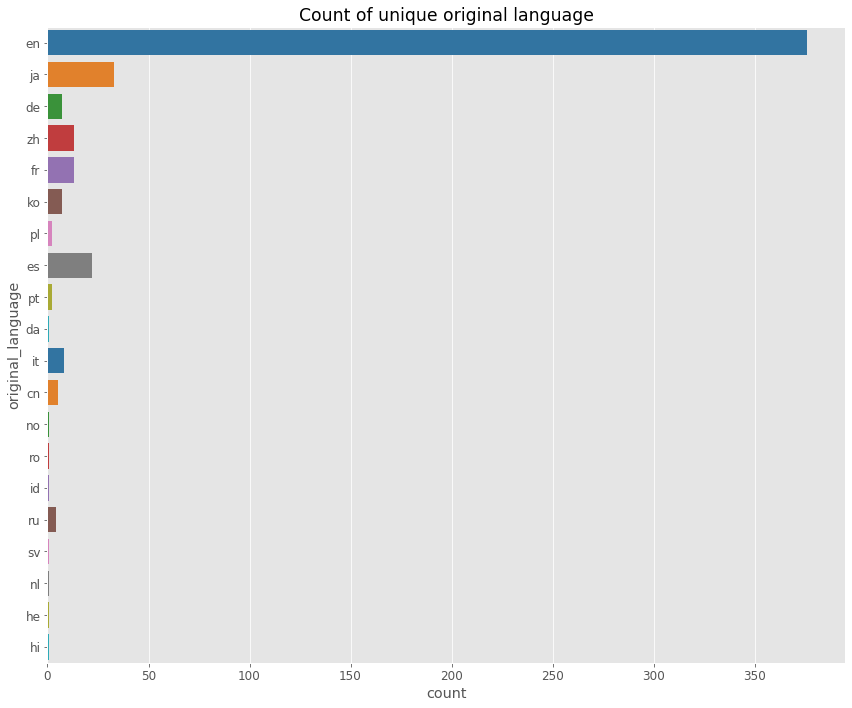

In [22]:
ax = sns.countplot(
  data=df, 
  y='original_language', palette='tab10',
)

ax.set(title='Count of unique original language')

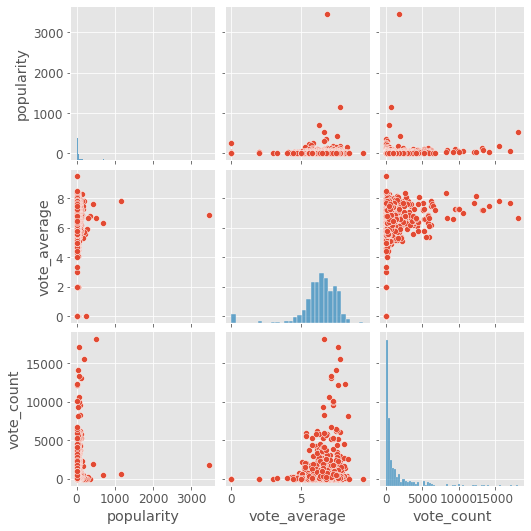

In [23]:
sns.pairplot(df)

In [24]:
df_corr = df[['popularity', 'vote_average', 'vote_count']].corr()
df_corr

,popularity,vote_average,vote_count
popularity,1.000000,0.039034,0.087434
vote_average,0.039034,1.000000,0.209543
vote_count,0.087434,0.209543,1.000000


<AxesSubplot:>

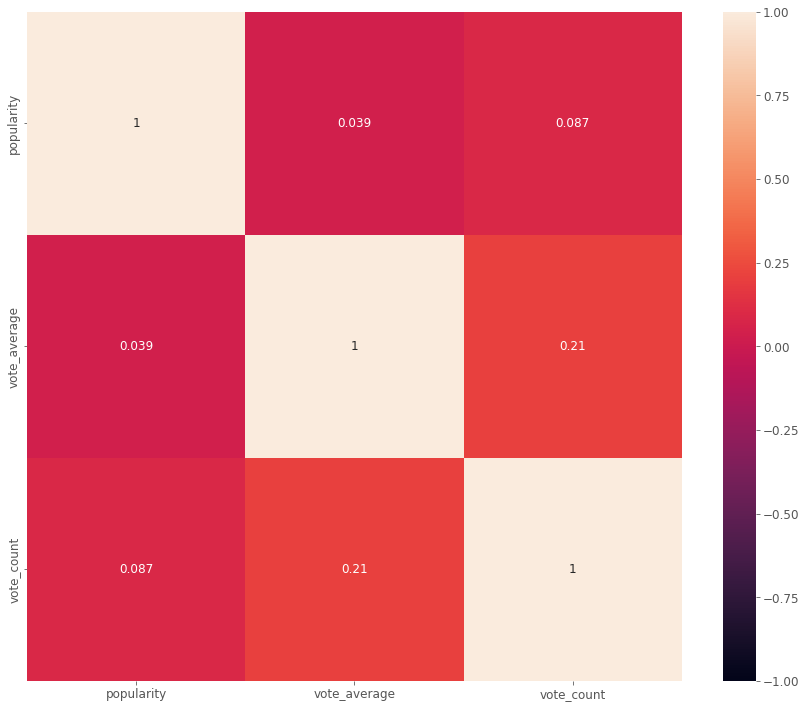

In [25]:
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)

In [26]:
from matplotlib.ticker import FuncFormatter

# set y-axis formatter
def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
  return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# bar plot helper function
def plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data, 
        x=x, y=y, 
        ci=None, hue=hue, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    return plot_bar

# Top 20 Movies by Popularity 

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

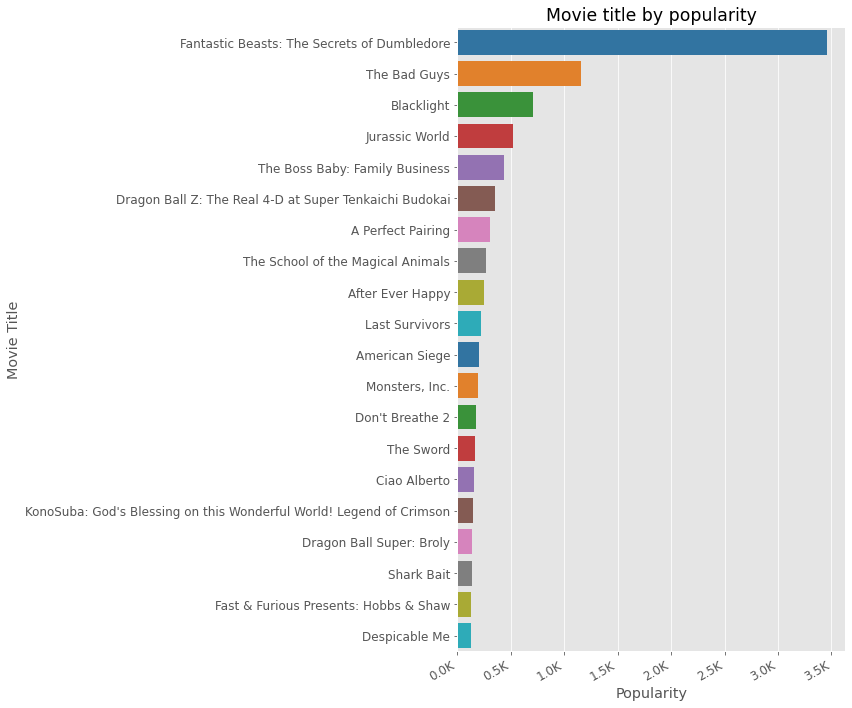

In [27]:
plot_bar(
  data=df.sort_values(by='popularity', ascending=False).head(20),
  x='popularity', y='title', 
  palette='tab10',
  title='Movie title by popularity', xlabel='Popularity', ylabel='Movie Title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Count

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

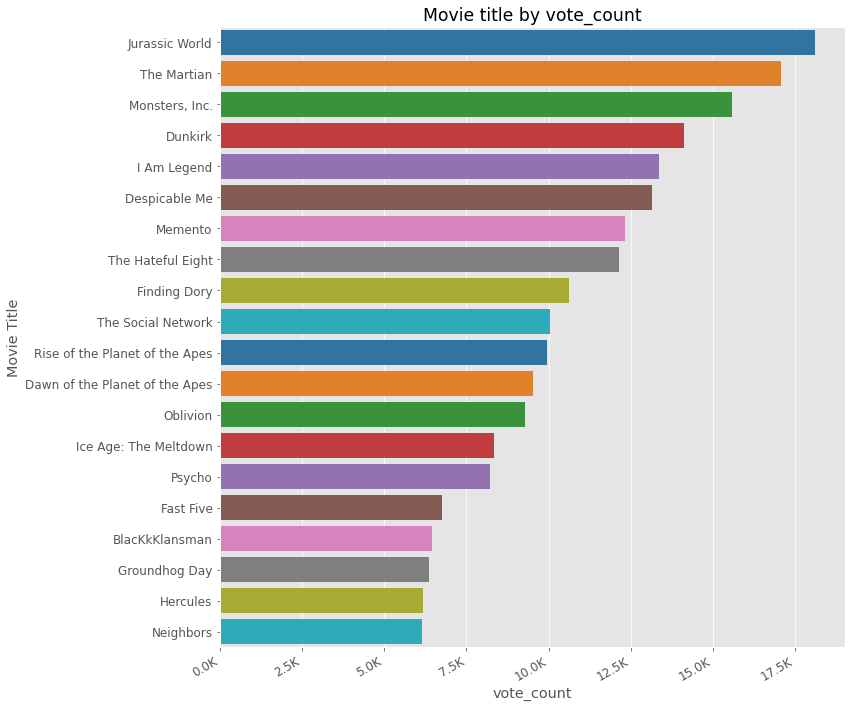

In [28]:
plot_bar(
  data=df.sort_values(by='vote_count', ascending=False).head(20),
  x='vote_count', y='title', 
  palette='tab10',
  title='Movie title by vote_count', xlabel='vote_count', ylabel='Movie Title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Average

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

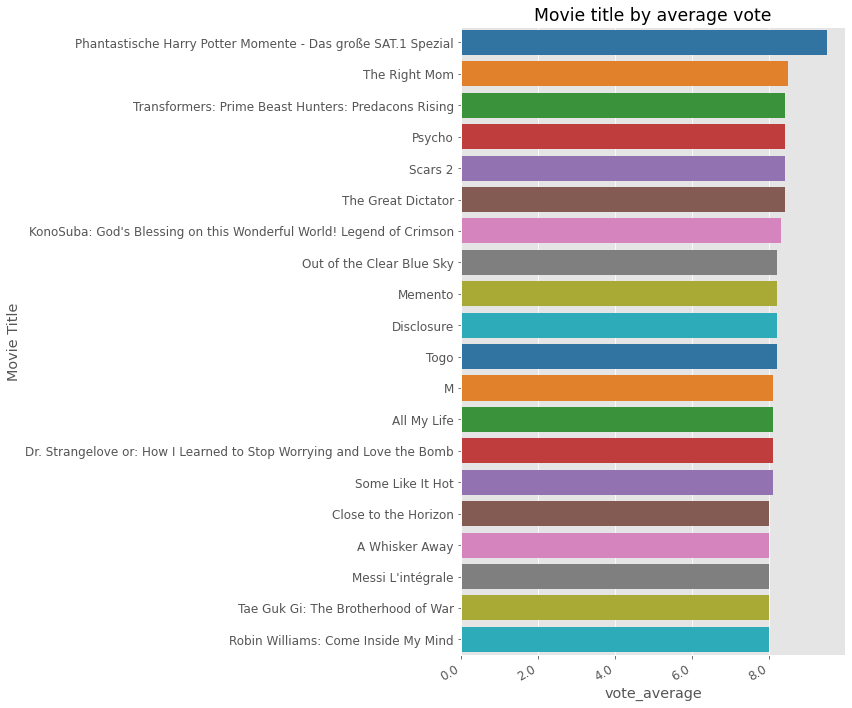

In [29]:
plot_bar(
  data=df.sort_values(by='vote_average', ascending=False).head(20),
  x='vote_average', y='title', 
  palette='tab10',
  title='Movie title by average vote', xlabel='vote_average', ylabel='Movie Title',
  formatter=format_orig
)

# Movies With Release Date

In [30]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
release_date = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies[:52]:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  rel_date = release_date.append(pg['results'][0]['release_date']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [31]:
data1 = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df1 = pd.DataFrame(data=data1)
df1.head()

,page_number,adult,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,1,False,338953,en,3456.961,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1795
1,2,False,629542,en,1159.223,/7qop80YfuO0BwJa1uXk1DXUUEwv.jpg,2022-03-17,The Bad Guys,7.8,650
2,3,False,823625,en,704.187,/bv9dy8mnwftdY2j6gG39gCfSFpV.jpg,2022-02-10,Blacklight,6.3,438
3,4,False,135397,en,520.592,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,2015-06-06,Jurassic World,6.7,18114
4,5,False,459151,en,433.276,/kv2Qk9MKFFQo4WQPaYta599HkJP.jpg,2021-07-01,The Boss Baby: Family Business,7.6,1952


In [32]:
# drop page number and adult columns
df1.drop(columns=['page_number', 'adult'], inplace=True)
df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,338953,en,3456.961,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1795
1,629542,en,1159.223,/7qop80YfuO0BwJa1uXk1DXUUEwv.jpg,2022-03-17,The Bad Guys,7.8,650
2,823625,en,704.187,/bv9dy8mnwftdY2j6gG39gCfSFpV.jpg,2022-02-10,Blacklight,6.3,438
3,135397,en,520.592,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,2015-06-06,Jurassic World,6.7,18114
4,459151,en,433.276,/kv2Qk9MKFFQo4WQPaYta599HkJP.jpg,2021-07-01,The Boss Baby: Family Business,7.6,1952


In [33]:
df1.shape

(52, 8)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 52 non-null     int64  
 1   original_language  52 non-null     object 
 2   popularity         52 non-null     float64
 3   poster_path        52 non-null     object 
 4   release_date       52 non-null     object 
 5   title              52 non-null     object 
 6   vote_average       52 non-null     float64
 7   vote_count         52 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ KB


In [35]:
pd.value_counts(df1.dtypes)

object     4
int64      2
float64    2
dtype: int64

In [36]:
df1['id'] = df1['id'].astype('category')                        # convert id to categorical            
df1['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 52 entries, 0 to 51
Series name: id
Non-Null Count  Dtype   
--------------  -----   
52 non-null     category
dtypes: category(1)
memory usage: 2.6 KB


In [37]:
df1['release_date'] = pd.to_datetime(df1['release_date'])       # convert release date to datetime
df1.dtypes

id                         category
original_language            object
popularity                  float64
poster_path                  object
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [38]:
df1['year'] = df1['release_date'].dt.year                       # extract year
df1['month'] = df1['release_date'].dt.month                     # extract month
df1['day'] = df1['release_date'].dt.day                         # extract day
df1['day_name'] = df1['release_date'].dt.day_name()             # extract day name
df1['week'] = df1['release_date'].dt.week                       # extract week
df1['quarter']= df1['release_date'].dt.quarter                  # extract quarter

df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,3456.961,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1795,2022,4,6,Wednesday,14,2
1,629542,en,1159.223,/7qop80YfuO0BwJa1uXk1DXUUEwv.jpg,2022-03-17,The Bad Guys,7.8,650,2022,3,17,Thursday,11,1
2,823625,en,704.187,/bv9dy8mnwftdY2j6gG39gCfSFpV.jpg,2022-02-10,Blacklight,6.3,438,2022,2,10,Thursday,6,1
3,135397,en,520.592,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,2015-06-06,Jurassic World,6.7,18114,2015,6,6,Saturday,23,2
4,459151,en,433.276,/kv2Qk9MKFFQo4WQPaYta599HkJP.jpg,2021-07-01,The Boss Baby: Family Business,7.6,1952,2021,7,1,Thursday,26,3


In [39]:
df1['year'] = np.int64(df1['year'])                             # change year to integer data type
df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,3456.961,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1795,2022,4,6,Wednesday,14,2
1,629542,en,1159.223,/7qop80YfuO0BwJa1uXk1DXUUEwv.jpg,2022-03-17,The Bad Guys,7.8,650,2022,3,17,Thursday,11,1
2,823625,en,704.187,/bv9dy8mnwftdY2j6gG39gCfSFpV.jpg,2022-02-10,Blacklight,6.3,438,2022,2,10,Thursday,6,1
3,135397,en,520.592,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,2015-06-06,Jurassic World,6.7,18114,2015,6,6,Saturday,23,2
4,459151,en,433.276,/kv2Qk9MKFFQo4WQPaYta599HkJP.jpg,2021-07-01,The Boss Baby: Family Business,7.6,1952,2021,7,1,Thursday,26,3


In [40]:
df1.describe(exclude='number')

,id,original_language,poster_path,release_date,title,day_name
count,52.0,52,52,52,52,52
unique,52.0,6,52,51,52,6
top,440.0,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2018-09-05 00:00:00,Fantastic Beasts: The Secrets of Dumbledore,Friday
freq,1.0,42,1,2,1,18
first,NaN,NaN,NaN,1996-09-11 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2022-08-25 00:00:00,NaN,NaN


In [41]:
df1.drop(columns=['year', 'month', 'day',	'week', 'quarter']).describe(include='number')

,popularity,vote_average,vote_count
count,52.000000,52.000000,52.000000
mean,231.008962,6.696154,2876.788462
std,492.560613,1.230329,4275.311617
min,63.678000,0.000000,0.000000
25%,80.270000,6.175000,121.000000
50%,104.499500,6.800000,722.500000
75%,167.099500,7.500000,4288.750000
max,3456.961000,8.300000,18114.000000


<AxesSubplot:xlabel='popularity', ylabel='Density'>

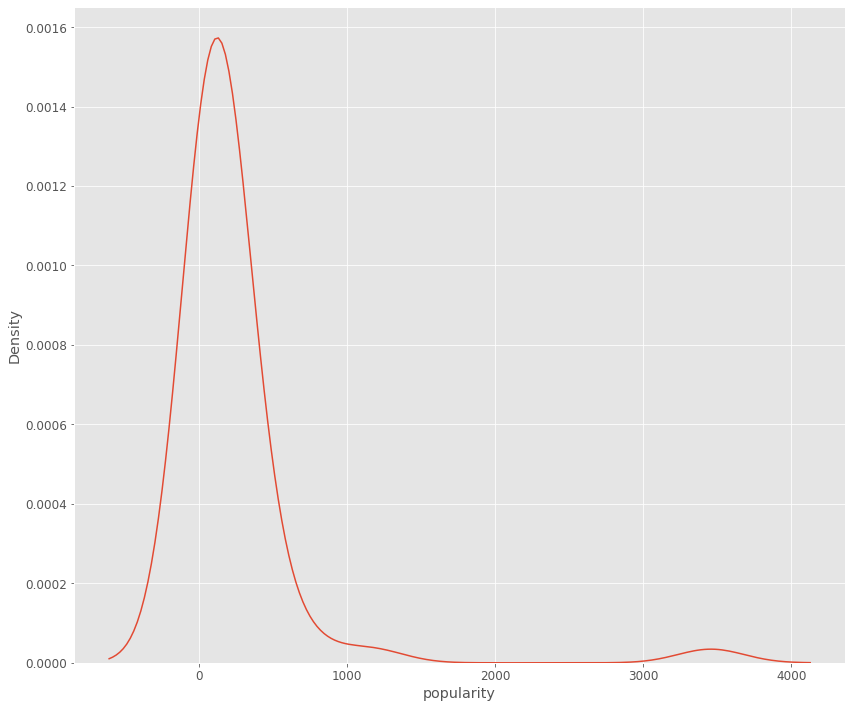

In [42]:
plotkde(data=df1, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

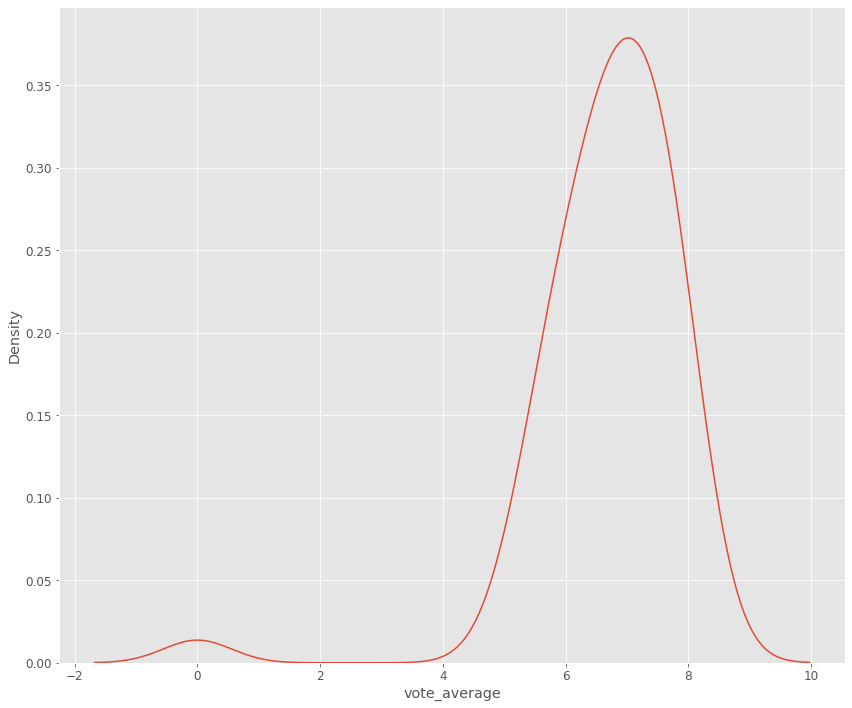

In [43]:
plotkde(data=df1, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

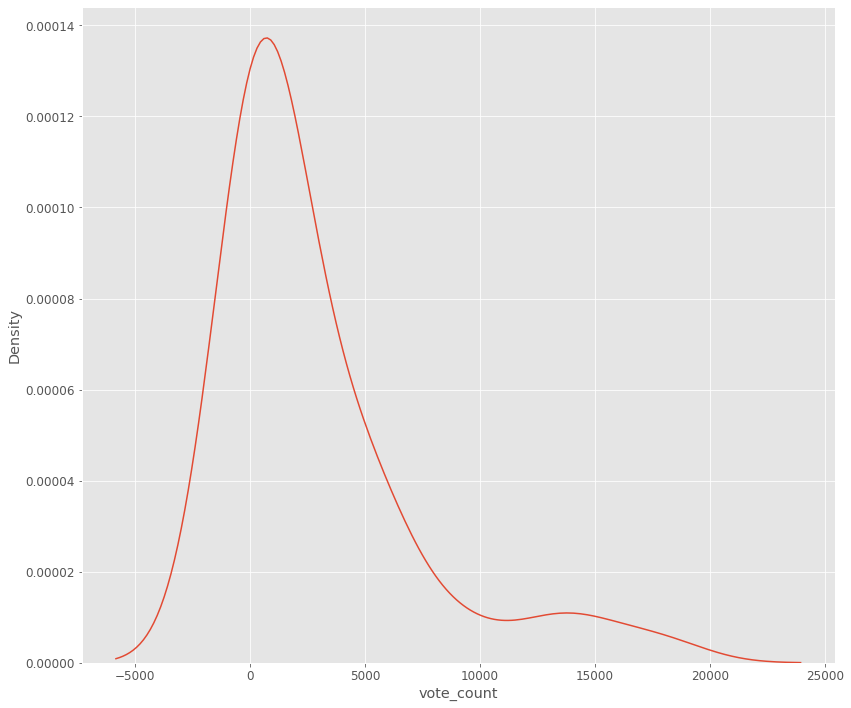

In [44]:
plotkde(data=df1, x='vote_count')

# Missing Values Exploration

In [45]:
df1.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
month                0
day                  0
day_name             0
week                 0
quarter              0
dtype: int64

<AxesSubplot:>

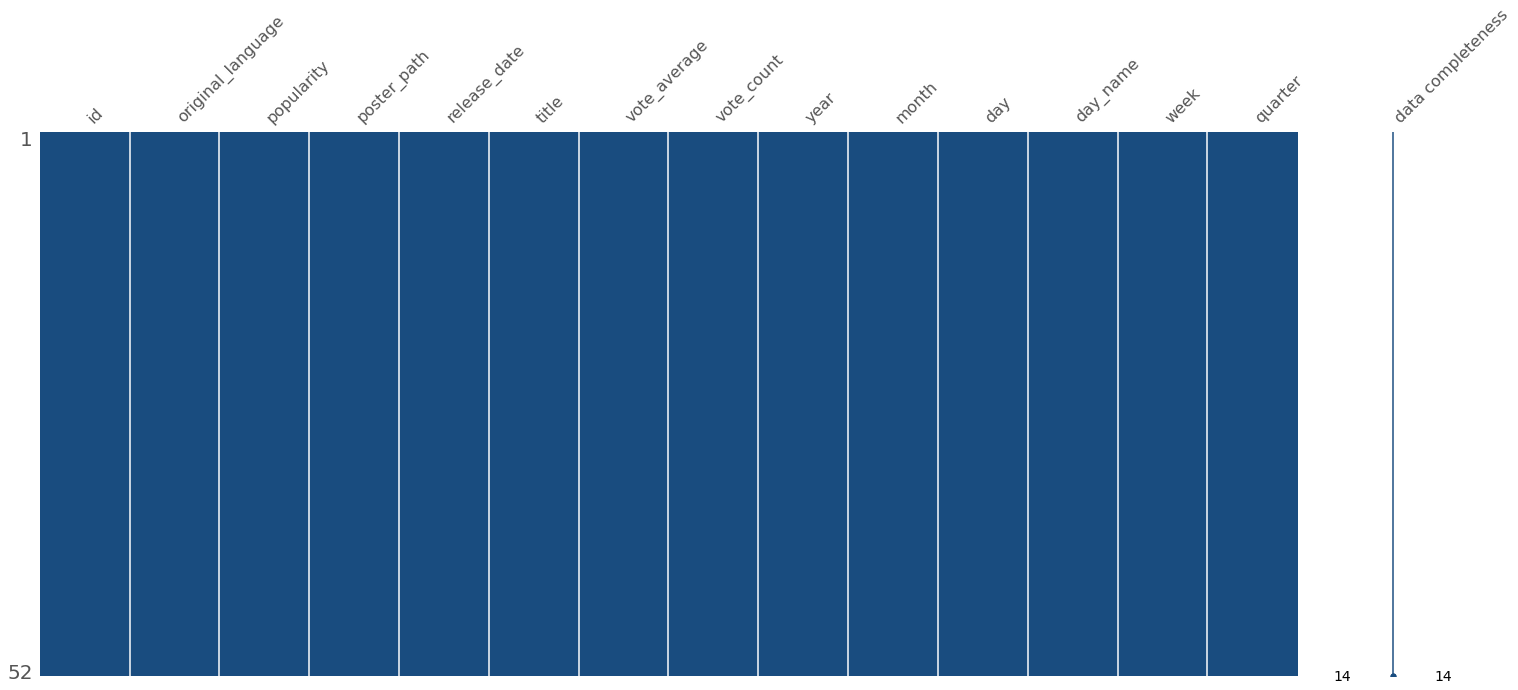

In [46]:
msno.matrix(df1, labels=True, sort='descending', color=(0.1, 0.3, 0.5))

In [47]:
df1.duplicated().sum()                                # check for duplicates

0

In [48]:
df1.loc[df.duplicated(subset=['id'])]                 # check where id is duplicated

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter


[Text(0.5, 1.0, 'Count of unique original language')]

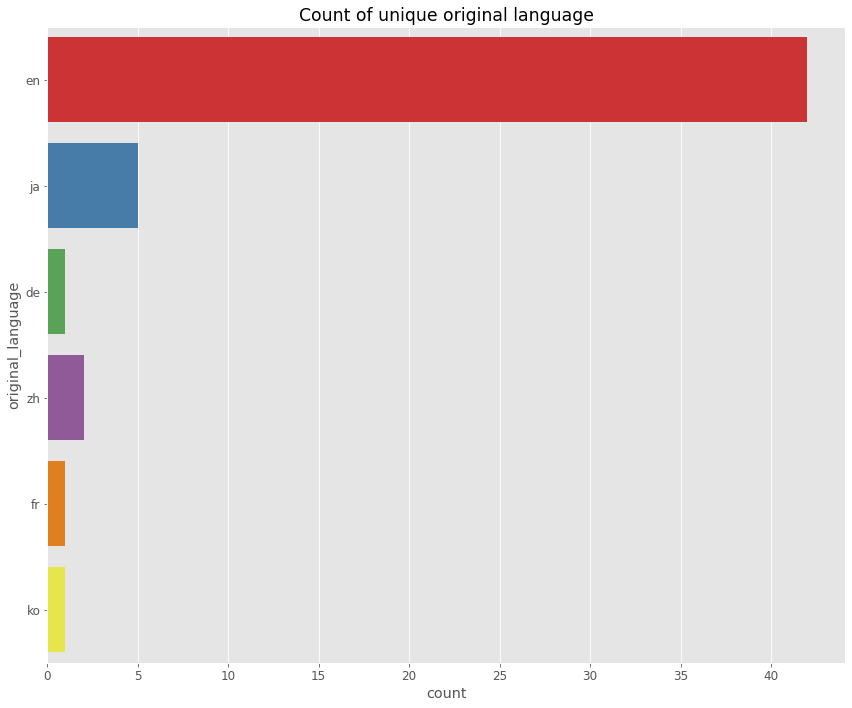

In [49]:
ax1 = sns.countplot(
  data=df1,
  y='original_language', palette='Set1',
)

ax1.set(title='Count of unique original language')

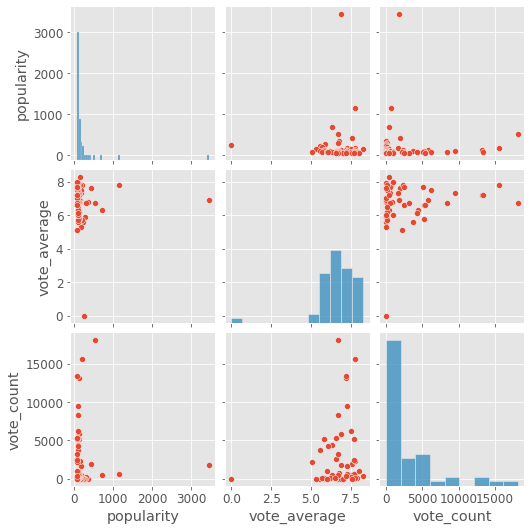

In [50]:
sns.pairplot(df1[['popularity', 'vote_average', 'vote_count']])

In [51]:
df_corr1 = df1[['popularity', 'vote_average', 'vote_count']].corr()
df_corr1

,popularity,vote_average,vote_count
popularity,1.000000,0.021551,-0.032103
vote_average,0.021551,1.000000,0.153702
vote_count,-0.032103,0.153702,1.000000


<AxesSubplot:>

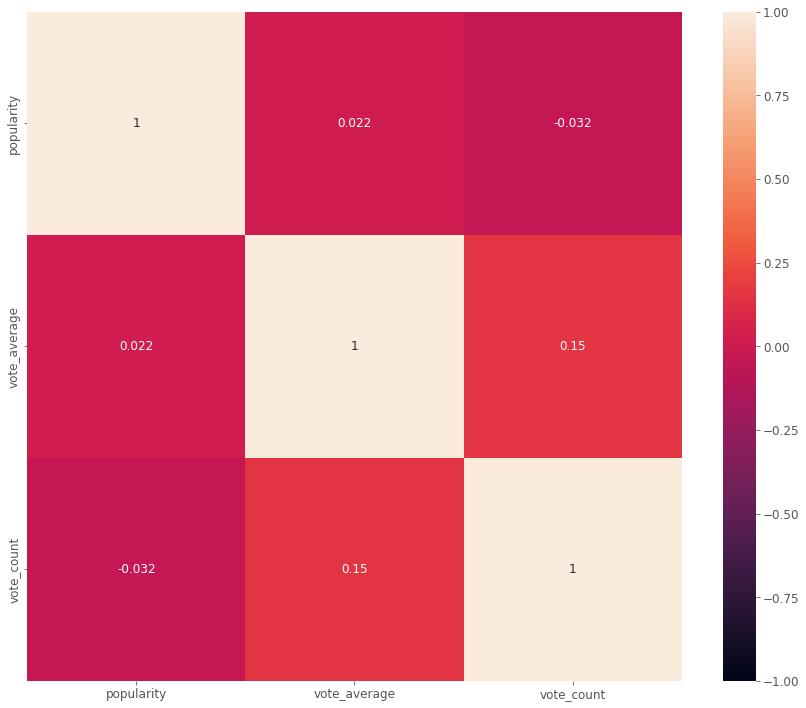

In [52]:
sns.heatmap(df_corr1, annot=True, vmin=-1, vmax=1)

# Data Grouping and Aggregation

<AxesSubplot:xlabel='year', ylabel='popularity'>

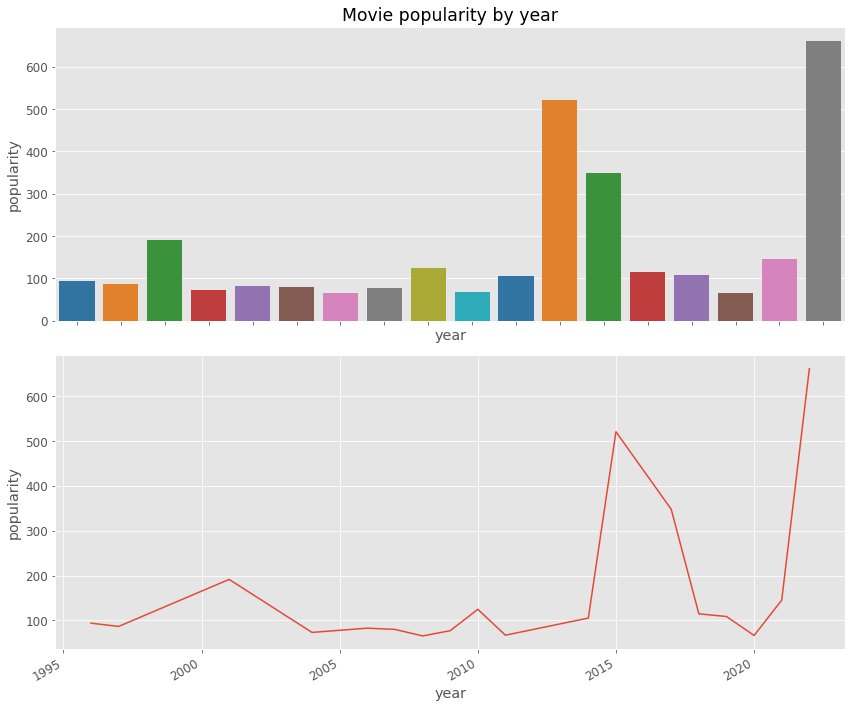

In [53]:
# create figure and axis
fig, (axs1, axs2) = plt.subplots(2, 1)
fig.autofmt_xdate()

sns.barplot(
  data=df1,
  x='year', y='popularity', ci=None,
  palette='tab10', 
  ax=axs1
)

# label plot title
axs1.set(title='Movie popularity by year')

sns.lineplot(
  data=df1,
  x='year', y='popularity', ci=None,
  palette='tab10',
  ax=axs2
)